Common terms
Common terms you see when doing problems involving arrays:

##### Subarray - A range of contiguous values within an array.
Example: given an array [2, 3, 6, 1, 5, 4], [3, 6, 1] is a subarray while [3, 1, 5] is not a subarray.

##### Subsequence - A sequence that can be derived from the given sequence by deleting some or no elements without changing the order of the remaining elements.
Example: given an array [2, 3, 6, 1, 5, 4], [3, 1, 5] is a subsequence but [3, 5, 1] is not a subsequence.

Techniques:


1) Sliding window
Master the sliding window technique that applies to many subarray/substring problems. In a sliding window, the two pointers usually move in the same direction will never overtake each other. This ensures that each value is only visited at most twice and the time complexity is still O(n). Examples: Longest Substring Without Repeating Characters, Minimum Size Subarray Sum, Minimum Window Substring

2) Two pointers
Two pointers is a more general version of sliding window where the pointers can cross each other and can be on different arrays. Examples: Sort Colors, Palindromic Substrings

When you are given two arrays to process, it is common to have one index per array (pointer) to traverse/compare the both of them, incrementing one of the pointers when relevant. For example, we use this approach to merge two sorted arrays. Examples: Merge Sorted Array

3) Traversing from the right
Sometimes you can traverse the array starting from the right instead of the conventional approach of from the left. Examples: Daily Temperatures, Number of Visible People in a Queue

4) Sorting the array
Is the array sorted or partially sorted? If it is, some form of binary search should be possible. This also usually means that the interviewer is looking for a solution that is faster than O(n).

Can you sort the array? Sometimes sorting the array first may significantly simplify the problem. Obviously this would not work if the order of array elements need to be preserved. Examples: Merge Intervals, Non-overlapping Intervals

5) Precomputation
For questions where summation or multiplication of a subarray is involved, pre-computation using hashing or a prefix/suffix sum/product might be useful. Examples: Product of Array Except Self, Minimum Size Subarray Sum, LeetCode questions tagged "prefix-sum"

6) Index as a hash key
If you are given a sequence and the interviewer asks for O(1) space, it might be possible to use the array itself as a hash table. For example, if the array only has values from 1 to N, where N is the length of the array, negate the value at that index (minus one) to indicate presence of that number. Examples: First Missing Positive, Daily Temperatures

7) Traversing the array more than once
This might be obvious, but traversing the array twice/thrice (as long as fewer than n times) is still O(n). Sometimes traversing the array more than once can help you solve the problem while keeping the time complexity to O(n).

Technique: Sliding Window
Link: https://www.youtube.com/watch?v=1pkOgXD63yU&list=PLot-Xpze53leOBgcVsJBEGrHPd_7x_koV

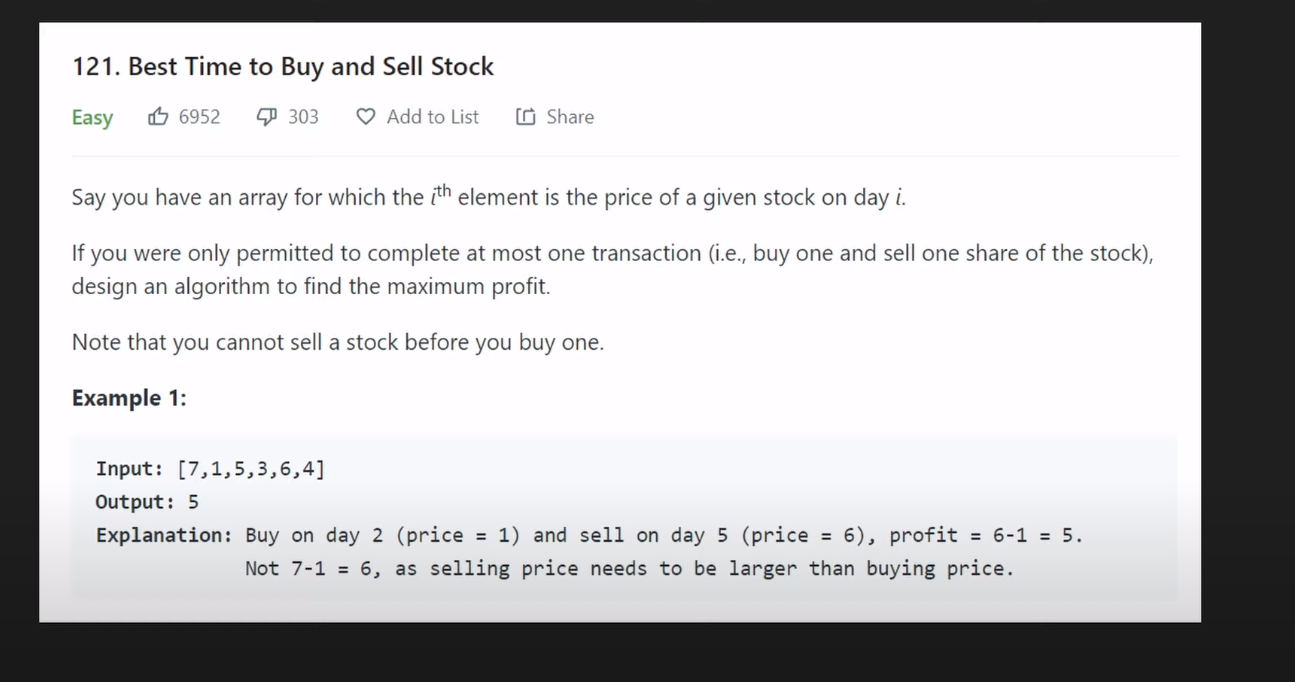

In [1]:
def solution(arr):
    l,r = 0,1
    max_profit=0
    while(r < len(arr)):
        if (arr[l] < arr[r]):
            local_profit = arr[r] - arr[l]
            max_profit = max(max_profit,local_profit)
        else:
            l=r # l+=1 would also work but l=r is better as we directly go to the point that is better for selling
        r+=1
    return max_profit

input=[7,1,5,3,6,4]
maxP = solution(input)
print(f'Max Profit = {maxP}')

        


        

Max Profit = 5


Technique: Double Pointer
Link: https://www.youtube.com/watch?v=FPCZsG_AkUg

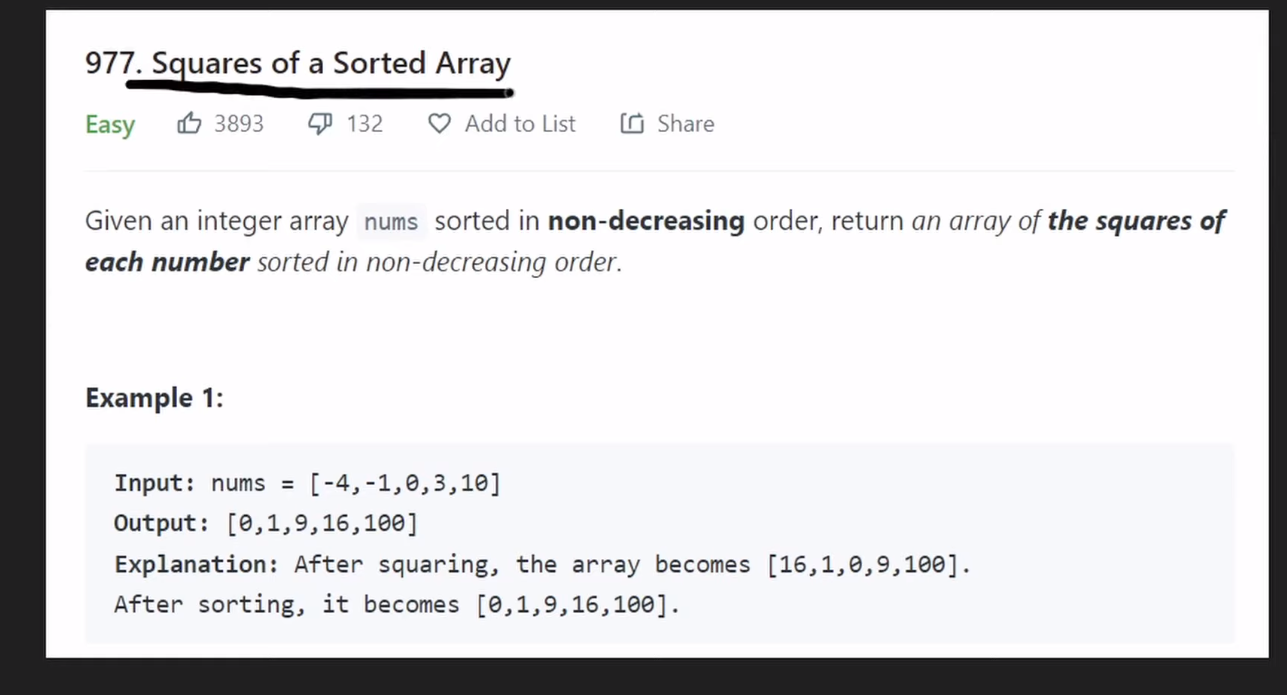

In [13]:
def solution(arr):
    left = 0
    right = len(arr)-1
    new_arr=[]
    while(left<=right):
        if abs(arr[left])>=abs(arr[right]):
            sq_val = arr[left]*arr[left]
            new_arr.append(sq_val)
            left+=1
        else:
            sq_val = arr[right]*arr[right]
            new_arr.append(sq_val)
            right-=1
    return list(reversed(new_arr))

result = solution([-4,-1,0,3,10])
print(result)
        
        

[0, 1, 9, 16, 100]


Technique: Sliding Window
Link: https://www.youtube.com/watch?v=aYqYMIqZx5s

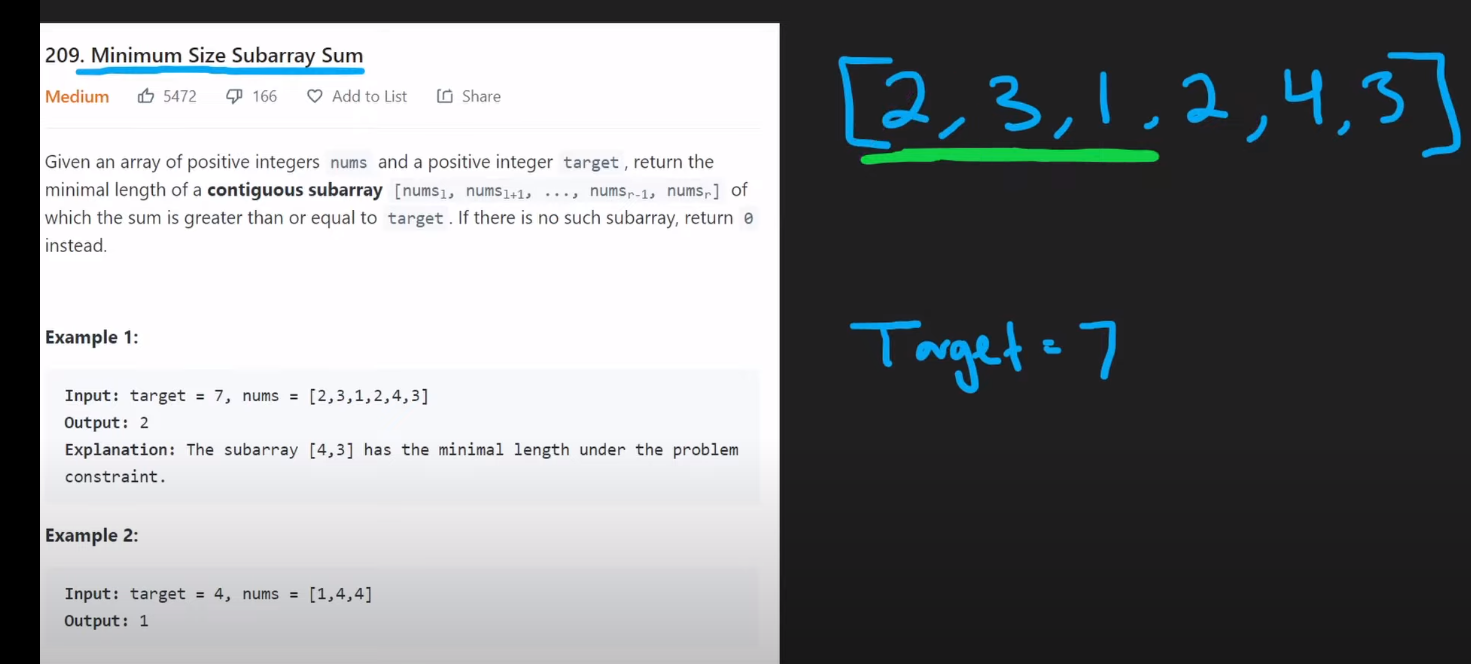

In [21]:
def solution(arr,target):
    left, total = 0,0
    result = float("inf")

    for r in range(len(arr)):
        total += arr[r]
        while total>=target:
            result = min(r-left+1,result)
            total-=arr[left]
            left+=1    
    
    return 0 if result == float("inf") else result

arr= [2,3,1,2,4,3]
ans = solution(arr,7)
print(ans)


2


Technique: Double pointer

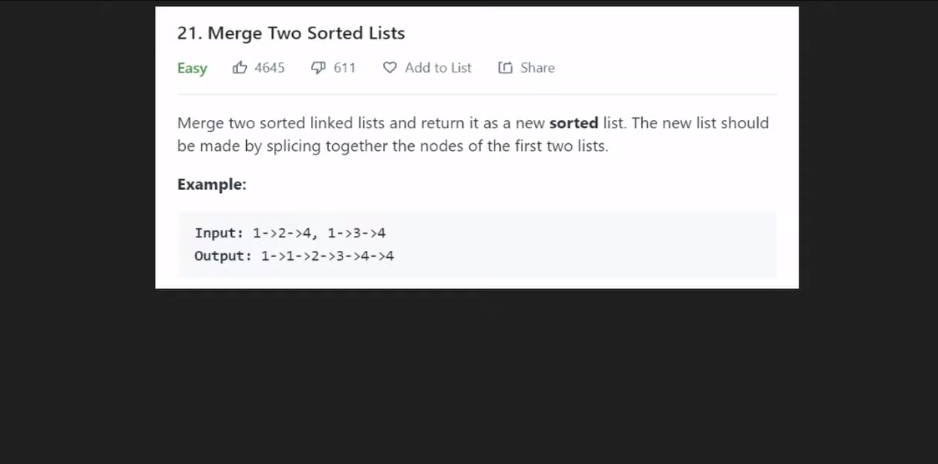

In [32]:
def solution(arr1,arr2):
    i1,i2=0,0
    new_arr = []
    smaller_len = min(len(arr1),len(arr2))
    while(i1<len(arr1) and i2<len(arr2)):
        if arr1[i1]<=arr2[i2]:
            new_arr.append(arr1[i1])
            i1+=1
        else:
            new_arr.append(arr2[i2])
            i2+=1
            
    if(i1!=len(arr1)):
        for i in range(i1,len(arr1)):
            new_arr.append(arr1[i])

    elif (i2!=len(arr2)):
        for i in range(i2,len(arr2)):
            new_arr.append(arr2[i])
    
    return new_arr

result = solution([1,2,4],[1,3,4])
print(result)
        


[1, 1, 2, 3, 4, 4]


#### Essential questions:

These are essential questions to practice if you're studying for this topic:
- Two Sum
- Best Time to Buy and Sell Stock
- Product of Array Except Self
- Maximum Subarray


Problem: Two sum

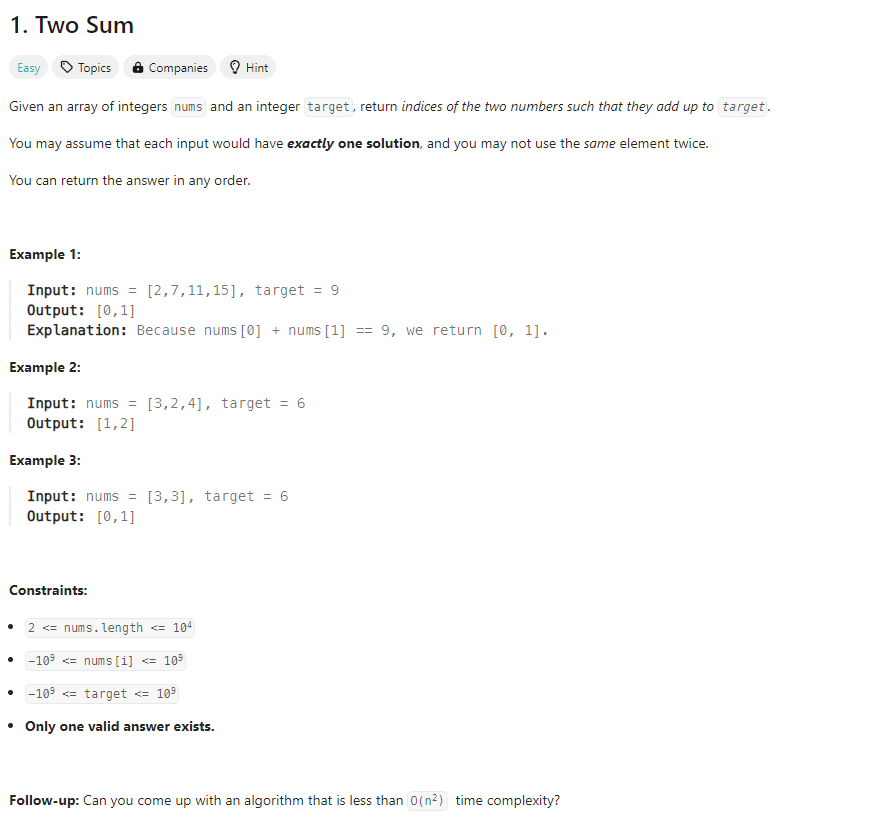


### Below is the Linear Solution

In [41]:
def solution(arr,target):
    hashtable = dict()
    result = []

    for element in arr:
        if (hashtable.get(element)==None):
            hashtable[element]=1
        else:
            hashtable[element]+=1

    for element in arr:
        needed_value = target-element
        if (hashtable.get(needed_value)!=None):
            result.extend([element,needed_value])
            break
    return result

result = solution([1,2,9,16,1,1],1)
print(f"Ans = {result}")

Ans = []


### Here is the optimal solution

Link: https://leetcode.com/problems/two-sum/solutions/4428985/naive-to-optimal-video-walkthrough-for-beginners-python/

Reason = We r populating hashmap as traversing and finding its complement. Suppose 't' is our target and the current element is 'a' and complement of 'a' is 'b'. so if we go through 'a' we notice 'b' is not in hashmap right now but we append 'a' in hashmap. now when we reach 'b' and find complement of 'b' which is 'a' we notice it is in array so we have our answer

In [42]:
class Solution:
    def twoSum(self, nums, target):
        seen = {}
        i = 0
        while i < len(nums):
            num = nums[i]
            complement = target - num
            if complement in seen:
                return [i, seen[complement]]
            seen[num] = i
            i += 1
        

Link: https://www.youtube.com/watch?v=bNvIQI2wAjk

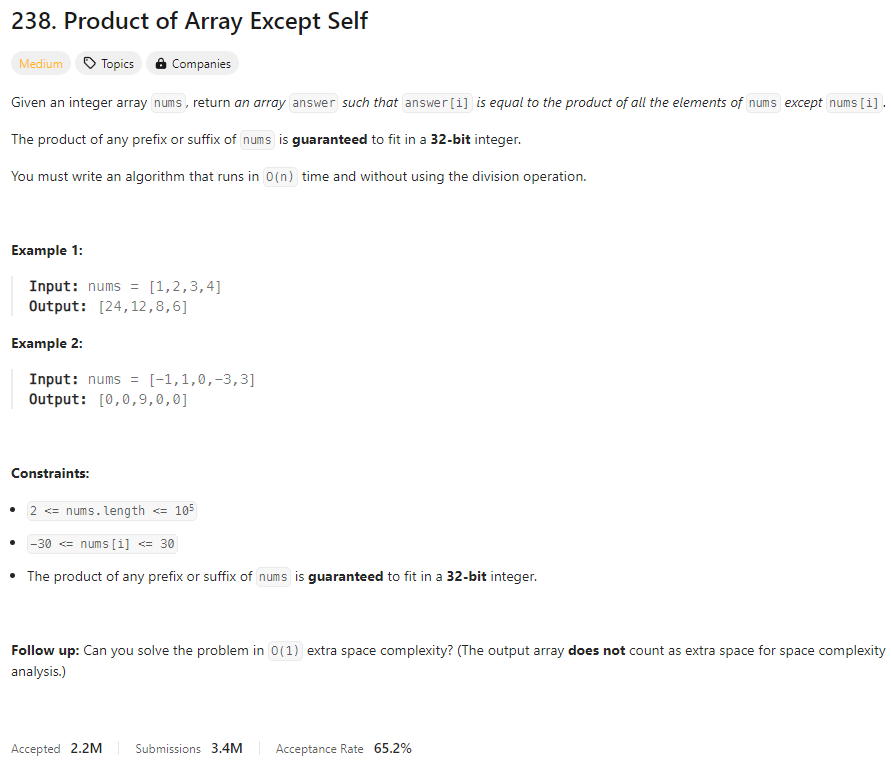

### Below solution is not the most optimal one. Watch the video to understand the optimal solution

In [ ]:
class Solution:
    def productExceptSelf(self, nums: list[int]) -> list[int]:
        pro = 1
        rpro = 1
        ans = []
        left = [] # prefix product
        right = [] # postfix product
        
        # Calculate the product of elements to the left of each element.
        for x in nums:
            left.append(pro)
            pro = pro * x
        
        # Calculate the product of elements to the right of each element.
        for x in reversed(nums):
            right.append(rpro)
            rpro = rpro * x
        
        # Calculate the final result by multiplying corresponding left and right products.
        for i in range(len(nums)):
            ans.append(left[i] * right[len(nums) - 1 - i])
        
        return ans

Link: https://www.youtube.com/watch?v=5WZl3MMT0Eg

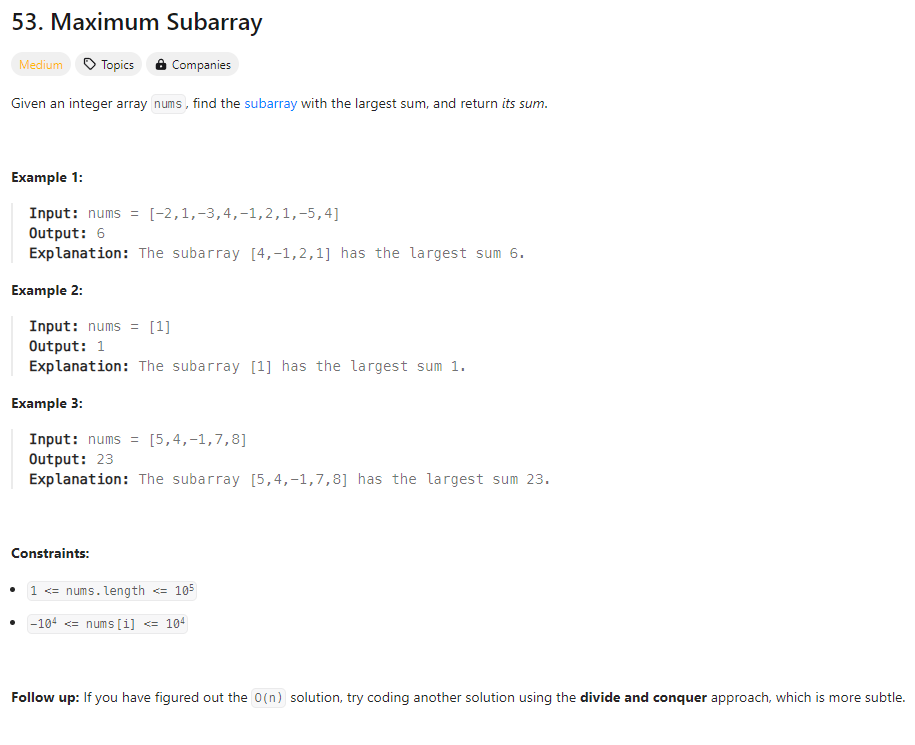

Azam Approach: Azam approach and the solution in the video is same

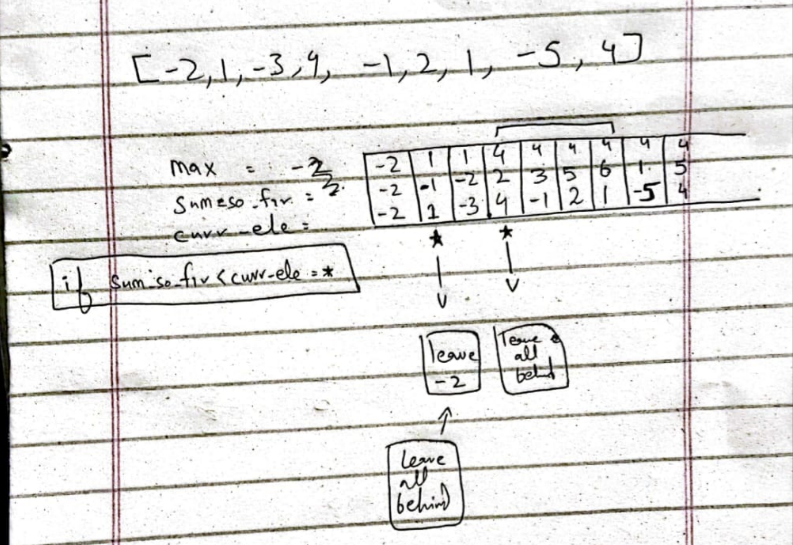